In [ ]:
""" !-- This file handles task 2. Data Analysis, Visualization, and Filtration 
Interactive Visualizations Using Python and Streamlit, create dynamic visualizations.
""" 

In [ ]:
# Install and Import external modules and libraries

%pip install mysql-connector-python
import mysql.connector

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from dotenv import load_dotenv


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Connect to the new database created //imdb_movies
# # Load environment variables from .env file
# load_dotenv('secrets.env')

# conn = mysql.connector.connect(
#     host=MYSQL_HOST,
#     port=MYSQL_PORT,
#     database=MYSQL_DATABASE,
#     user=MYSQL_USER,
#     password=MYSQL_PASSWORD

# )
conn = mysql.connector.connect(
    host="localhost",
    user="USERNAME",
    password="PASSWORD",
    database="imdb_movies"
)
cursor = conn.cursor()
print("Successfully connected to the 'imdb_movies' database!")

Successfully connected to the 'imdb_movies' database!


In [3]:
query = "SELECT * FROM imdb_movies;"  # Select all values from imdb_movies
cursor.execute(query)

# Fetch all results
movies_data = pd.DataFrame()
movies_data = cursor.fetchall()

# Fetch column names
columns = [col[0] for col in cursor.description]
# Convert to DataFrame
movies_df = pd.DataFrame()
movies_df = pd.DataFrame(movies_data, columns=columns)
# print(movies_df)

## Create Data frame from exisiting movies_df and clean data

## 1. Remove rows with any null values 
## 2. Remove rows where any column valu has 0
## 3. Change values ok to 1000
## 4. Convert duration to HH:MM format

movies_clean_df = movies_df.dropna()
movies_clean_df = movies_clean_df[~movies_clean_df.eq('0').any(axis=1)]
movies_clean_df["votes"] = movies_clean_df["votes"].apply(
    lambda x: str(int(float(x.replace("K", "")) * 1000)) if "K" in str(x) else str(int(x))
)
# movies_clean_df.loc[24]  # To Check: Select row with index 24 where vote value is 2.3k, votes should be 2300 with the above K value 

movies_clean_df["Duration in HH:MM"] = movies_clean_df["duration"].str.extract(r'(\d+)h', expand=False).fillna(0).astype(int).astype(str).str.zfill(2) + ":" + \
                     movies_clean_df["duration"].str.extract(r'(\d+)m', expand=False).fillna(0).astype(int).astype(str).str.zfill(2)
# movies_clean_df.loc[90]  # To Check: Select row with index 90 where duration value is 44mm, Duration in HH:MM should be 00:44 with the above HH:MM conversion
movies_clean_df = movies_clean_df[movies_clean_df["Duration in HH:MM"] != "00:00"] # Delete rows where the duration is "00:00"

# Verify the cleaned dataset
movies_clean_df = movies_clean_df.reset_index(drop=True) #Reset index value in order after data cleaning
print(movies_clean_df.info())  # Show dataset summary
movies_clean_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 967 non-null    int64 
 1   title              967 non-null    object
 2   rating             967 non-null    object
 3   votes              967 non-null    object
 4   duration           967 non-null    object
 5   genre              967 non-null    object
 6   Duration in HH:MM  967 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.0+ KB
None


,id,title,rating,votes,duration,genre,Duration in HH:MM
0,1,Kraven the Hunter,5.5,52000,2h 7m,Action,02:07
1,2,Gladiator II,6.5,225000,2h 28m,Action,02:28
2,3,Twisters,6.5,165000,2h 2m,Action,02:02
3,4,Sonic the Hedgehog 3,6.9,57000,1h 50m,Action,01:50
4,5,Venom: The Last Dance,6.0,114000,1h 50m,Action,01:50
...,...,...,...,...,...,...,...
962,996,The Everything Pot,7.3,32,1h 30m,Romance,01:30
963,997,My Ex's Wedding,8.6,46,1h 35m,Romance,01:35
964,998,Else,6.1,230,1h 40m,Romance,01:40
965,999,A Merry Royal Christmas,5.2,144,1h 28m,Romance,01:28


In [ ]:
# Task 2: Data Analysis, Visualization, and Filtration # Interactive Visualizations
# Using Python and Streamlit, create dynamic visualizations for:

# Top 10 Movies by Rating and Voting Counts: Identify movies with the highest ratings and significant voting engagement.
# Genre Distribution: Plot the count of movies for each genre in a bar chart.
# Average Duration by Genre: Show the average movie duration per genre in a horizontal bar chart.
# Voting Trends by Genre: Visualize average voting counts across different genres.
# Rating Distribution: Display a histogram or boxplot of movie ratings.
# Genre-Based Rating Leaders: Highlight the top-rated movie for each genre in a table.
# Most Popular Genres by Voting: Identify genres with the highest total voting counts in a pie chart.
# Duration Extremes: Use a table or card display to show the shortest and longest movies.
# Ratings by Genre: Use a heatmap to compare average ratings across genres.
# Correlation Analysis: Analyze the relationship between ratings and voting counts using a scatter plot.

In [4]:
# Sort movies by rating (highest first) & votes (highest first)

movies_clean_df["votes"] = movies_clean_df["votes"].astype(int) # convert datatype for acurate values
movies_clean_df["rating"] = movies_clean_df["rating"].astype(float) 

top10Rating_movies_df = pd.DataFrame()
top10Rating_movies_df = movies_clean_df.sort_values(by=["rating"], ascending=False).head(10)
top10Rating_movies_df = top10Rating_movies_df.sort_values(by=["votes"], ascending=False, ignore_index=True)

top10Rating_movies_df


,id,title,rating,votes,duration,genre,Duration in HH:MM
0,215,Attack on Titan the Movie: The Last Attack,9.2,15000,2h 25m,Animation,02:25
1,50,Attack on Titan the Movie: The Last Attack,9.2,15000,2h 25m,Action,02:25
2,206,Solo Leveling: ReAwakening,8.9,11000,2h 1m,Animation,02:01
3,16,Solo Leveling: ReAwakening,8.9,11000,2h 1m,Action,02:01
4,770,The Birds Who Fear Death,9.2,73,1h 42m,Crime,01:42
5,307,(S)KiDS,9.8,72,1h 25m,Animation,01:25
6,256,Mars,8.9,21,1h 24m,Animation,01:24
7,366,Nothing Unusual,9.7,12,1h 32m,Animation,01:32
8,399,Rocky and Bullwinkle,9.1,12,1h 40m,Animation,01:40
9,663,Reputation,9.3,8,1h 23m,Crime,01:23


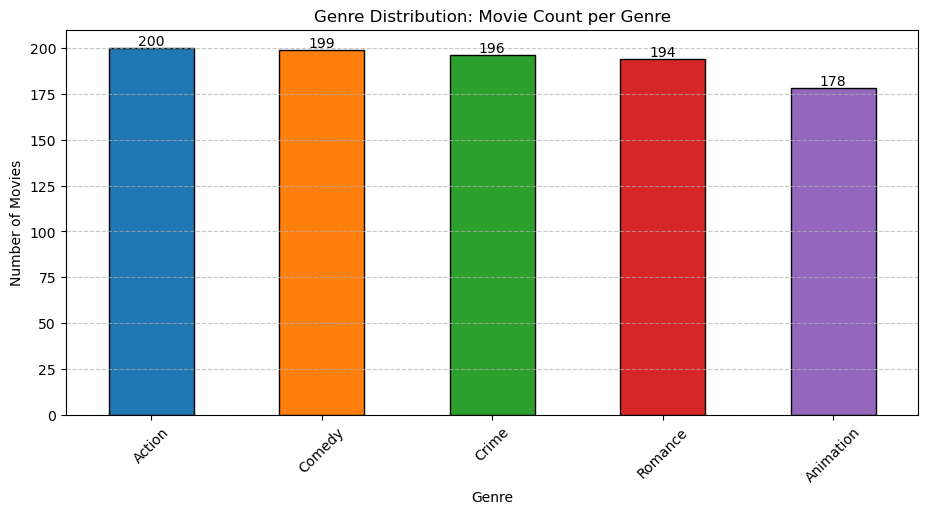

In [ ]:
# 2. Genre Distribution: Plot the count of movies for each genre in a bar chart.
import matplotlib.pyplot as plt
# Count movies per genre
count_movies_genre = movies_clean_df["genre"].value_counts()
colors = plt.cm.tab10.colors[:len(count_movies_genre)]

# Plot the bar chart
plt.figure(figsize=(11, 5))
bars=count_movies_genre.plot(kind="bar", color=colors, edgecolor="black")

# Add count values on top of bars
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )

plt.title("Genre Distribution: Movie Count per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


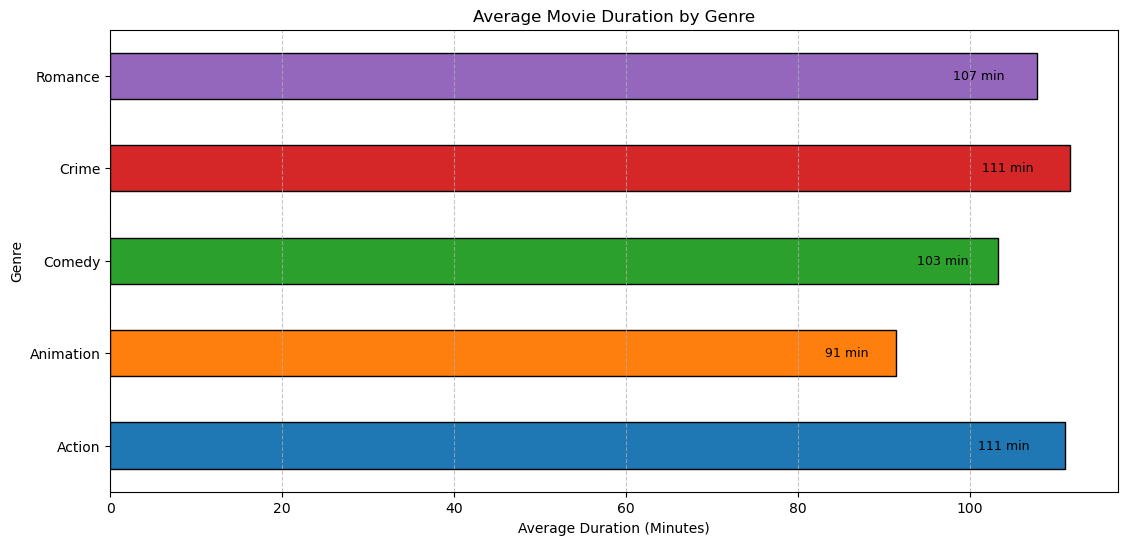

In [ ]:
# 3. Average Duration by Genre: Show the average movie duration per genre in a horizontal bar chart.
# Calculate average duration per genre
movies_clean_df["total_minutes"] = movies_clean_df["Duration in HH:MM"].apply(
    lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]) if isinstance(x, str) and ":" in x else None
)

movies_clean_df.dropna(subset=["total_minutes"], inplace=True) # Drop null values before averaging
avg_duration_per_genre = movies_clean_df.groupby("genre")["total_minutes"].mean() # Calculate the average duration per genre

# Plot horizontal bar chart
plt.figure(figsize=(13, 6))
barsh = avg_duration_per_genre .plot(kind="barh", color=colors, edgecolor="black")

# Add values
for bar in barsh.containers[0]:
    plt.text(
        bar.get_width()/ 1.1,
        bar.get_y() + bar.get_height() / 2, 
        f"{int(bar.get_width())} min",
        ha="left", va="center", fontsize=9, color="black"
    )

plt.title("Average Movie Duration by Genre")
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Genre")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


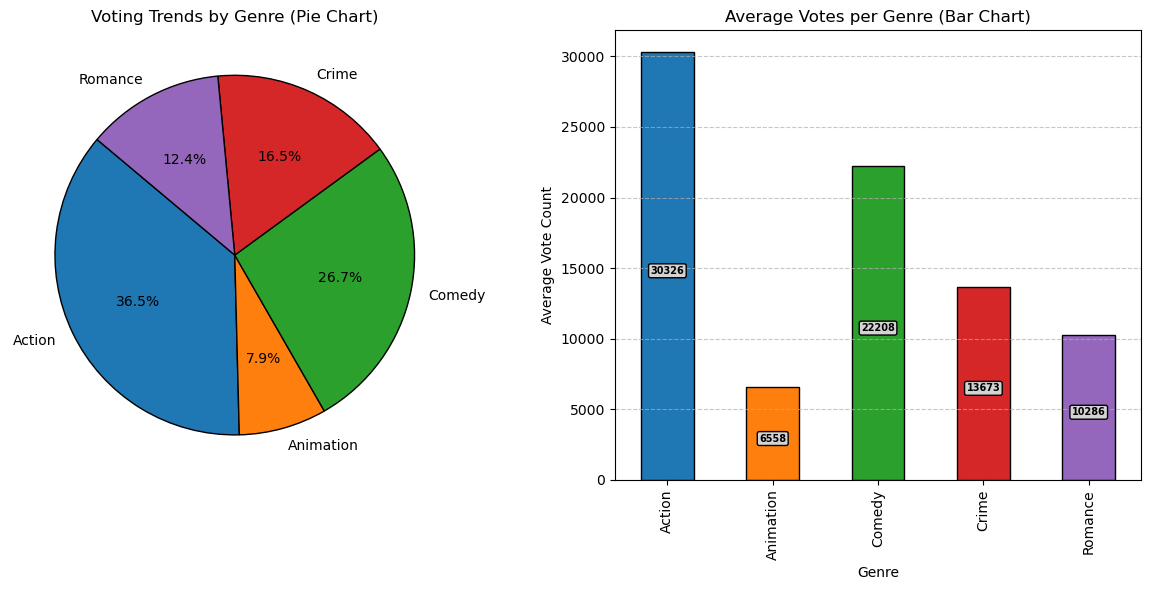

In [ ]:
# Voting Trends by Genre: Visualize average voting counts across different genres.

avg_votes_genre = movies_clean_df.groupby("genre")["votes"].mean() # Calculate average votes per genre

# Creating figure with two subplots: one for the pie chart, one for the bar chart
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart
axes[0].pie(
    avg_votes_genre, 
    labels=avg_votes_genre.index, 
    autopct="%1.1f%%", 
    colors=plt.cm.tab10.colors[:len(avg_votes_genre)], 
    startangle=140, 
    wedgeprops={"edgecolor": "black"}
)
axes[0].set_title("Voting Trends by Genre (Pie Chart)")

# Bar Chart
bar_chart=avg_votes_genre.plot(kind="bar", ax=axes[1], color=colors, edgecolor="black")
for bar in bar_chart.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        int(bar.get_height()),
        ha="center", va="top", fontsize=7, fontweight="bold", color="black",
        bbox=dict(facecolor="lightgrey", edgecolor="black", boxstyle="round,pad=0.2")
    )
axes[1].set_title("Average Votes per Genre (Bar Chart)")
axes[1].set_xlabel("Genre")
axes[1].set_ylabel("Average Vote Count")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Show both chart
plt.tight_layout()
plt.show()



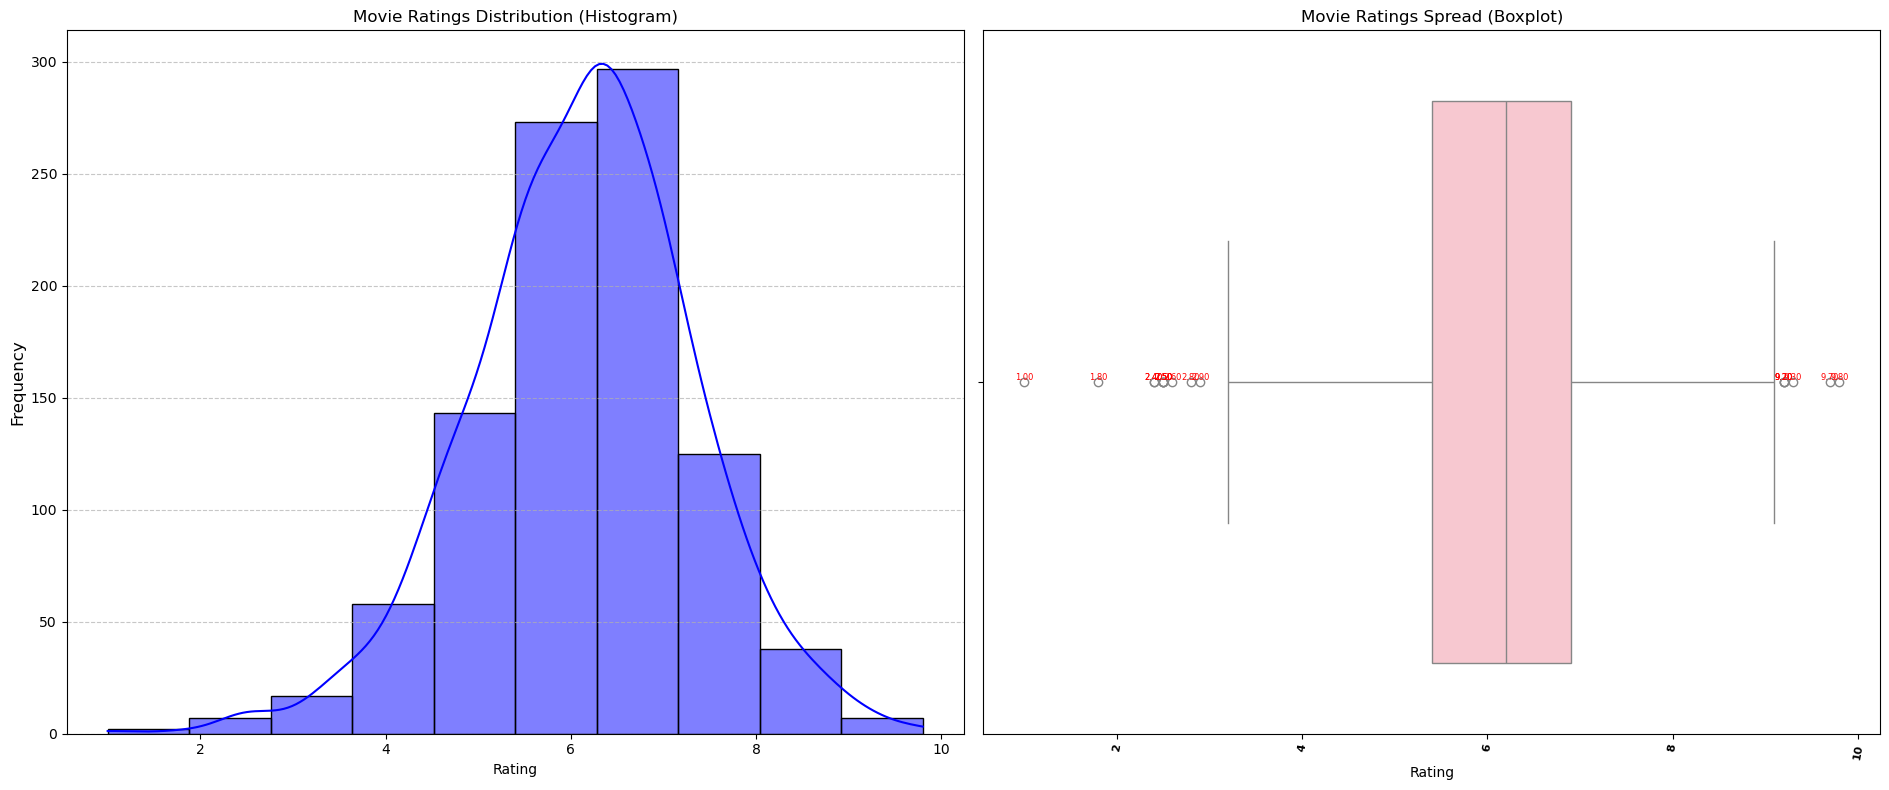

In [ ]:
# Rating Distribution: Display a histogram or boxplot of movie ratings.
import seaborn as sns

# Creating figure with two subplots: Histogram & Boxplot
fig, axes = plt.subplots(1, 2, figsize=(19, 8))

plt.xticks(rotation=80, fontsize=8, fontweight="bold")  # Rotates x-axis labels & makes them readable

# Histogram
sns.histplot(movies_clean_df["rating"], bins=10, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Movie Ratings Distribution (Histogram)")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Boxplot: Highlights median & outliers
sns.boxplot(x=movies_clean_df["rating"], color="pink", ax=axes[1])
axes[1].set_title("Movie Ratings Spread (Boxplot)")
axes[1].set_xlabel("Rating")

# Annotate outliers
outliers = movies_clean_df["rating"][
    (movies_clean_df["rating"] < movies_clean_df["rating"].quantile(0.25) - 1.5 * (movies_clean_df["rating"].quantile(0.75) - movies_clean_df["rating"].quantile(0.25))) |
    (movies_clean_df["rating"] > movies_clean_df["rating"].quantile(0.75) + 1.5 * (movies_clean_df["rating"].quantile(0.75) - movies_clean_df["rating"].quantile(0.25)))
]
for outlier in outliers:
    axes[1].text(outlier, 0, f"{outlier:.2f}", ha="center", va="bottom", fontsize=6, color="Red")

# # Show both plots
plt.tight_layout()
plt.show()


In [ ]:
# # Genre-Based Rating Leaders: Highlight the top-rated movie for each genre in a table.
# Highlighted_movies=top_movies = movies_clean_df.loc[movies_clean_df.groupby("genre")["rating"].idxmax()]
# Display the top 5 rated movies in each genre
toprated_movies = (
    movies_clean_df.groupby("genre", group_keys=False).apply(lambda x: x.nlargest(5, "rating"))  # Select the top 5 movies in each genre
)
# toprated_movies= toprated_movies[["id", "title", "rating", "genre"]] 
top_movies = toprated_movies.loc[toprated_movies.groupby("genre")["rating"].idxmax()].index # Identify the index value of the top-rated movies in each genre

# Optional: Creating a class to highlight only the top-rated rows in each genre
def highlight_top_movie(row):
    return ['color: green; font-weight: bold' if row.name in top_movies else '' for _ in row]
# Output
print("\n🎬 **Top 5 Rated Movies in Each Genre** 🎬")
toprated_movies =toprated_movies.style.apply(highlight_top_movie, axis=1)
toprated_movies

C:\Users\v-dhramaraj\AppData\Local\Temp\ipykernel_16008\417532917.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  movies_clean_df.groupby("genre", group_keys=False).apply(lambda x: x.nlargest(5, "rating"))  # Select the top 5 movies in each genre



🎬 **Top 5 Rated Movies in Each Genre** 🎬


,id,title,rating,votes,duration,genre,Duration in HH:MM,total_minutes
49,50,Attack on Titan the Movie: The Last Attack,9.200000,15000,2h 25m,Action,02:25,145
15,16,Solo Leveling: ReAwakening,8.900000,11000,2h 1m,Action,02:01,121
103,104,Black Heat,8.600000,117,1h 33m,Action,01:33,93
172,173,Black Creek,8.600000,7,1h 56m,Action,01:56,116
7,8,Dune: Part Two,8.500000,620000,2h 46m,Action,02:46,166
302,307,(S)KiDS,9.800000,72,1h 25m,Animation,01:25,85
352,366,Nothing Unusual,9.700000,12,1h 32m,Animation,01:32,92
214,215,Attack on Titan the Movie: The Last Attack,9.200000,15000,2h 25m,Animation,02:25,145
377,399,Rocky and Bullwinkle,9.100000,12,1h 40m,Animation,01:40,100
205,206,Solo Leveling: ReAwakening,8.900000,11000,2h 1m,Animation,02:01,121


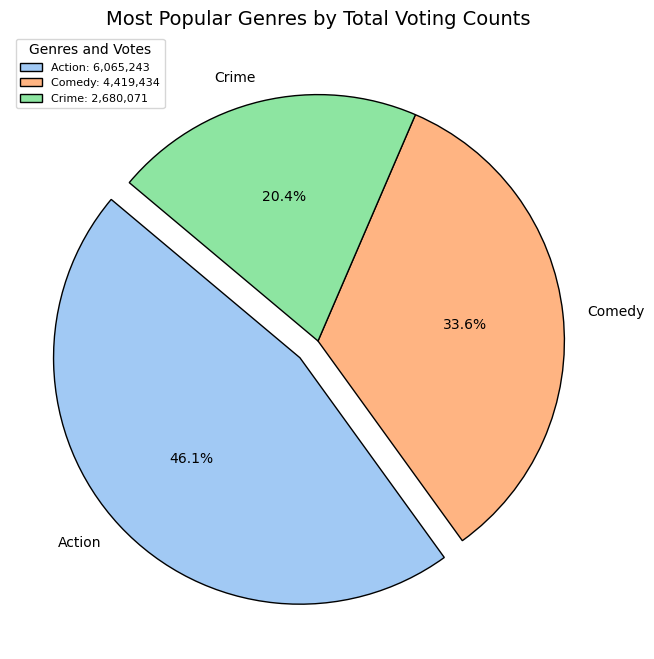

In [ ]:
# Most Popular Genres by Voting: Identify genres with the highest total voting counts in a pie chart.

top_votes = movies_clean_df.groupby("genre")["votes"].sum().sort_values(ascending=False) # Sort movies by votes (descending) and then by genre

# Limit the number of genres to top 3 for clarity
top_votes = top_votes.nlargest(3)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_votes,
    labels=top_votes.index,  # Use the index (genres) as labels
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel")[:len(top_votes)],
    startangle=140,
    wedgeprops={"edgecolor": "black"},
    explode=[0.1 if i == 0 else 0 for i in range(len(top_votes))]  # Emphasize highest voted genre
)
# Add a custom legend with genre names and voting counts
plt.legend(
    loc="upper left",
    labels=[f"{genre}: {vote:,}" for genre, vote in top_votes.items()],
    title="Genres and Votes",
    fontsize=8
)

plt.title("Most Popular Genres by Total Voting Counts", fontsize=14)
plt.show()



                                 title Duration in HH:MM
90  Rogue Elements: A Ryan Drake Story             00:44
6            Pushpa: The Rule - Part 2             03:21


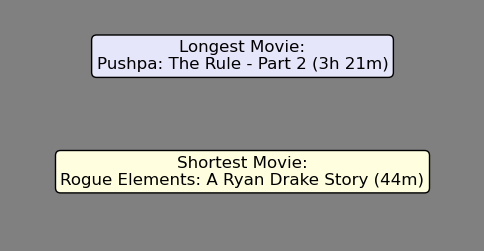

In [16]:
# Duration Extremes: Use a table or card display to show the shortest and longest movies.

shortest_movie = movies_clean_df.loc[movies_clean_df["Duration in HH:MM"].idxmin()]
longest_movie = movies_clean_df.loc[movies_clean_df["Duration in HH:MM"].idxmax()]

# Create a table with results
table_duration = pd.DataFrame([shortest_movie, longest_movie])
print(table_duration[["title", "Duration in HH:MM"]])

# Card-style display
fig, ax = plt.subplots(facecolor="grey",figsize=(6, 3))
ax.text(0.5, 0.3, f"Shortest Movie:\n{shortest_movie['title']} ({shortest_movie['duration']})", 
        fontsize=12, ha="center", va="center", bbox=dict(facecolor="lightyellow", edgecolor="black", boxstyle="round,pad=0.3"))
ax.text(0.5, 0.8, f"Longest Movie:\n{longest_movie['title']} ({longest_movie['duration']})", 
        fontsize=12, ha="center", va="center", bbox=dict(facecolor="lavender", edgecolor="black", boxstyle="round,pad=0.3"))
ax.set_axis_off()  # Hide axes


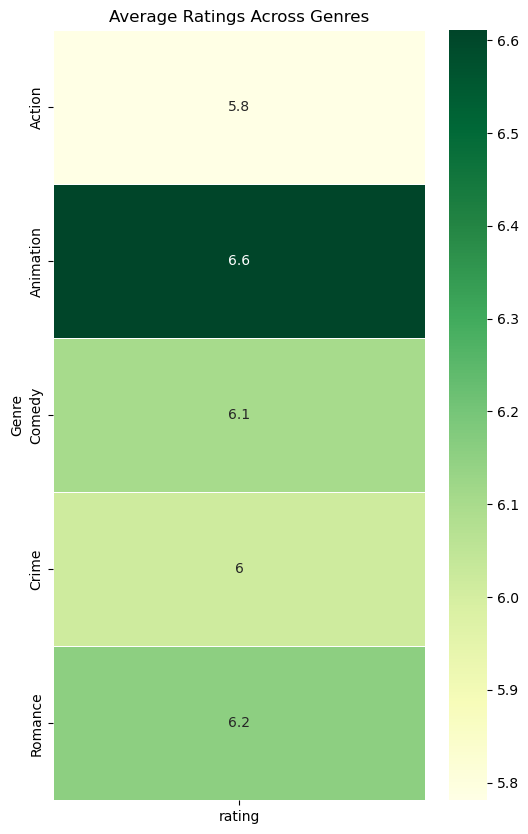

In [12]:
# Ratings by Genre: Use a heatmap to compare average ratings across genres.

# Calculate average ratings for each genre
average_ratings = movies_clean_df.groupby("genre")["rating"].mean().reset_index()

# Pivot data for heatmap
pivot_data = average_ratings.pivot_table(index="genre", values="rating")
plt.figure(figsize=(6, 10))
sns.heatmap(
    pivot_data, 
    annot=True, 
    cmap="YlGn", 
    linewidths=0.5, 
    # vmin=1,  # Set minimum value of the scale to 1
    # vmax=10  # Set maximum value of the scale to 10
)
plt.title("Average Ratings Across Genres", fontsize=12)
plt.ylabel("Genre")
plt.show()

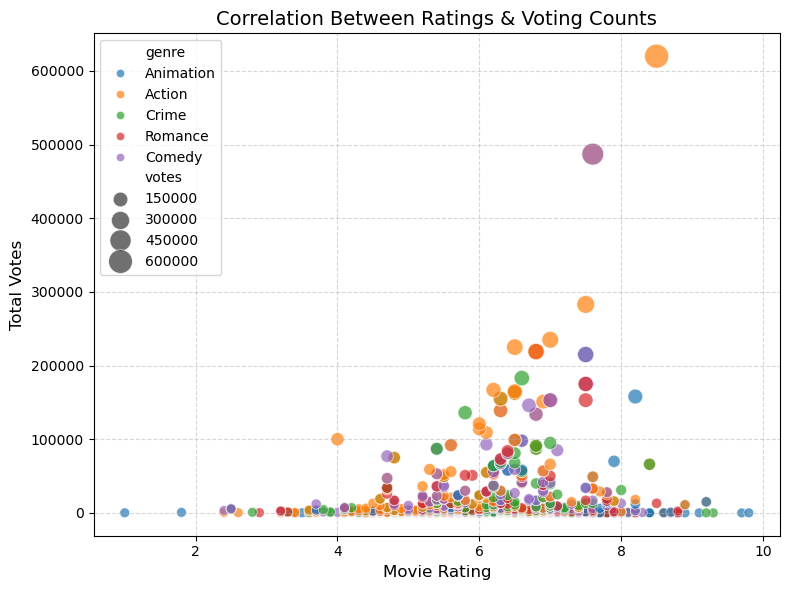

In [17]:
# Correlation Analysis: Analyze the relationship between ratings and voting counts using a scatter plot.
movies_clean_df_sorted = movies_clean_df.sort_values(by="votes", ascending=True)

# # Display original and converted votes
# print(movies_clean_df_sorted[["title", "votes"]])

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=movies_clean_df_sorted, 
    x="rating", 
    y="votes", 
    hue="genre", 
    size="votes", 
    sizes=(50, 300), 
    alpha=0.7
)
# # Set the y-axis range to start from certain range
# plt.ylim(1000, movies_clean_df["votes"].max() - 10000)

plt.title("Correlation Between Ratings & Voting Counts", fontsize=14)
plt.xlabel("Movie Rating", fontsize=12)
plt.ylabel("Total Votes", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

